# **Driver Drowsiness Detection Using Mediapipe In Python**

`Refference` : https://learnopencv.com/driver-drowsiness-detection-using-mediapipe-in-python/

## **Background**
1. Di Perkirakan 1 dari 25 pengemudi dewasa (18 tahun keatas) melaporkan tertidur saat mengemudi
2. Mengantuk bertanggung jawab atas 91.000 kecelakaan di jalan

<div align='center'>
    <img src="https://www.sfmic.com/wp-content/uploads/110518_drowsy_driving.jpg" alt="Alt Text" width="250">
</div>

## **Summary**
<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/01-drowsiness-detection-feature.gif" alt="Alt Text" width="250">
</div>

Mengemudi terus menerus bisa membosankan dan melelahkan. Seorang pengendara mungkin menjadi murung dan mungkin tertidur karena tidak aktif. Pada artikel ini, kami akan membuat sistem deteksi pengemudi yang mengantuk untuk mengatasi masalah tersebut. Untuk ini, kami akan menggunakan solusi Face Mesh dari Mediapipe dengan python dan rumus rasio Aspek Mata. Tujuan kami adalah membuat aplikasi yang kuat dan mudah digunakan yang mendeteksi dan memberi tahu pengguna jika mata mereka tertutup dalam waktu lama. 

## **Yang akan didapatkan?**
1. Mempelajari bagaimana mendeteksi landmark mata menggunakan Mediapipe Face Mesh
2. Memperkenalkan dan menguji coba teknik EAR (Eye Aspect Ratio)
3. Membuat Deteksi Pengemudi berbasis Aplikasi Web menggunakan streamlit
4. Menggunakan streamlit-webrtc untuk membantu mengirimkan video / suara secara real time selama di jaringan
5. Deploy 


## **Table of Contents**
- [Apa itu Drowsy Driving?](#apa-itu-drowsy-driving?)
- [Pendekatan Kita untuk Sistem Deteksi Pengemudi Mengantuk](#pendekatan-kita-untuk-sistem-deteksi-pengemudi-mengantuk)
- [Deteksi Landmark menggunakan Mediapipe Face Mesh di Python](#deteksi-landmark-menggunakan-mediapipe-face-mesh-di-python)
    - [Face Mesh Pipeline Demonstration](#face-mesh-pipeline-demonstration)
- [Teknik EAR (Eye Aspect Ratio)](#teknik-ear-eye-aspect-ratio)
- [Deteksi Pengemudi Mengantuk CODE di Python](#deteksi-pengemudi-mengantuk-code-di-python)
- [Kesimpulan](#kesimpulan)

### **Apa itu Drowsy Driving?**
Mengemudi terus menerus dapat membosankan dan melelahkan. CDC mendefinisikan mengemudi dalam keadaan mengantuk sebagai kombinasi berbahaya antara mengemudi dan rasa kantuk atau kelelahan. Karena kurangnya gerakan tubuh yang diizinkan, pengemudi mungkin mulai memiliki mata yang sayu, merasa mengantuk, dan akhirnya tertidur saat mengemudi. 
Tujuan kami adalah membuat aplikasi pendeteksi pengemudi mengantuk yang tangguh yang dapat mendeteksi dan memperingatkan pengguna jika mata mereka terpejam dalam waktu yang lama.


### **Pendekatan Kita untuk Sistem Deteksi Pengemudi Mengantuk**
##### **Bagaimana cara sistem deteksi pengemudi mengantuk bekerja?**
1. Akses ke Kamera
2. Menerapkan Algoritma untuk Mendeteksi titik-titik pada wajah (facial landmarks)
3. Menerapkan Algoritma untuk menentukan apa yang dimaksud dengan kelopak mata tertutup (“closed eyelids”)


##### **Solution**
1. Kita menggunakan kamera apapun yang bisa untuk streaming (webcam)
2. Kita menggunakan pre-build Mediapipe Face Mesh Solution pipeline di Python
3. Kita akan menggunakan teknik sederhana namun tangguh yaitu Eye Aspect Ratio (EAR)
    <br>refferensi http://vision.fe.uni-lj.si/cvww2016/proceedings/papers/05.pdf
	<br>Dalam makalah yang ditautkan di atas, para penulis telah menjelaskan pendekatan mereka terhadap pendeteksian kedipan mata. Kedipan mata adalah tindakan menutup dan membuka kembali dengan cepat. Untuk itu, penulis menggunakan pengklasifikasi SVM untuk mendeteksi kedipan mata sebagai pola nilai EAR dalam jendela temporal yang pendek.


##### **Bagaimana cara kerja kita mendeteksi mengantuk?**
- Kami tidak ingin mendeteksi "kedipan", melainkan apakah mata tertutup atau tidak. Untuk melakukan ini, kita bahkan tidak perlu melakukan pelatihan apa pun. Kita akan menggunakan pengamatan sederhana, "Mata kita tertutup ketika kita merasa mengantuk." 
- Untuk membuat sistem pendeteksi rasa kantuk pengemudi, kita hanya perlu menentukan apakah mata tetap tertutup selama interval waktu yang berkelanjutan.
- Untuk mendeteksi apakah mata tertutup atau tidak, kita dapat menggunakan rumus Eye Aspect Ratio (EAR):
<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/04-driver-drowsiness-detection-EAR-equation-1-768x167.png" alt="Alt Text" width="400">
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/03-driver-drowsiness-detection-EAR-points-768x297.png" alt="Alt Text" width="400">
</div>



##### **Bagaimana cara kerjanya?**
##### Flow Chart
<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/05-driver-drowsiness-detection-application-algorithm-flowchart_v4.png" alt="Alt Text" width="200">
</div>

##### Pseudo Code
1. **Pertama, kita deklarasikan dua nilai ambang dan sebuah penghitung.**
    - `EAR_thresh:` Nilai ambang untuk memeriksa apakah nilai EAR saat ini berada dalam rentang yang diinginkan.
    - `D_TIME:` Variabel penghitung untuk melacak waktu yang telah berlalu dengan EAR saat ini < EAR_THRESH.
    - `WAIT_TIME:` Untuk menentukan apakah jumlah waktu yang telah berlalu dengan EAR < EAR_THRESH melebihi batas yang diizinkan.
2. **Ketika aplikasi dimulai, kita catat waktu saat ini (dalam detik) dalam variabel t1 dan baca bingkai masuk.**
    - `Selanjutnya`, kita lakukan pra-pemrosesan dan lewatkan bingkai melalui alur solusi Face Mesh dari Mediapipe.
    - `Kita ambil titik landmark mata yang relevan (Pi)` jika ada deteksi landmark yang tersedia. Jika tidak, kita atur ulang t1 dan D_TIME (D_TIME juga diatur ulang di sini untuk menjadikan algoritma konsisten).
    - `Jika terdapat deteksi,` hitung nilai EAR rata-rata untuk kedua mata menggunakan titik landmark mata yang diambil.
    - `Jika EAR saat ini < EAR_THRESH,` tambahkan selisih antara waktu saat ini t2 dan t1 ke D_TIME. Kemudian atur ulang t1 untuk bingkai berikutnya menjadi t2.
    - `Jika D_TIME >= WAIT_TIME,` kita akan mengeluarkan alarm atau melanjutkan ke bingkai berikutnya.



### **Deteksi Landmark menggunakan Mediapipe Face Mesh di Python**
Refference:  https://learnopencv.com/introduction-to-mediapipe/
<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/06-driver-drowsiness-detection-Mediapipe-FaceMesh-landmark-points.gif" alt="Alt Text" width="200"> <br>
    <span>Kotak merah menunjukkan area yang dikrop sebagai masukan ke model tengara, titik-titik merah mewakili 468 tengara dalam bentuk 3D, dan garis hijau yang menghubungkan tengara mengilustrasikan kontur di sekitar mata, alis, bibir, dan seluruh wajah.</span>
</div>

### **Detail Landmark**

<div align='center'>
    <img src="https://raw.githubusercontent.com/whisnumurtyga/diware/master/skeleton-landmark.png" alt="Alt Text" width="500">
    <img src="https://raw.githubusercontent.com/whisnumurtyga/diware/master/galgadot-landmark.jpg" alt="Alt Text" width="500">
    <br><span>Catatan: Gambar yang ditangkap oleh kamera dibalik secara horizontal. Jadi, tengara (pada gambar di atas) di mata (wilayah) sebelah kiri Anda adalah untuk mata kanan dan sebaliknya.</span>
</div>

#### **So What?**
- Karena kami berfokus pada deteksi kantuk pengemudi, dari 468 titik, kami hanya memerlukan titik-titik tengara yang termasuk dalam wilayah mata. Daerah mata memiliki 32 titik landmark (masing-masing 16 titik). Untuk menghitung EAR, kita hanya memerlukan 12 titik (6 untuk setiap mata).

**Dari refferensi detail landmark, 12 titik yang akan kita ambil adalah sebagai berikut**
1. `Untuk mata Kiri:`  [362, 385, 387, 263, 373, 380]<br>
2. `Untuk mata Kanan:` [33, 160, 158, 133, 153, 144]<br>
3. `Titik landmark yang dipilih adalah urut:` P1, P2, P3, P4, P5, P6

- Harap diperhatikan bahwa titik-titik di atas bukanlah koordinat. 
- Titik-titik tersebut menunjukkan posisi indeks dalam daftar output yang dikembalikan oleh solusi face mesh. Untuk mendapatkan koordinat x, y (dan z), kita harus melakukan pengindeksan pada daftar yang dikembalikan.

Face Detection Link : https://learnopencv.com/what-is-face-detection-the-ultimate-guide/

#### **Face Mesh Pipeline Demonstration**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
 
mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates
 
%matplotlib inline

In [3]:
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) 
 
# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))
 
# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)
 
# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

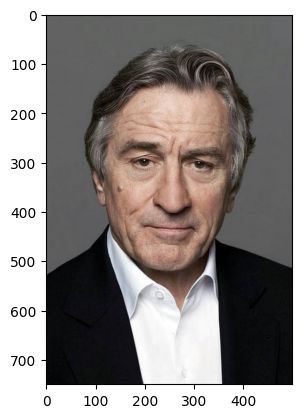

In [4]:
# load the image
image = cv2.imread(r"assets/test-open-eyes.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
image = np.ascontiguousarray(image)
imgH, imgW, _ = image.shape
 
plt.imshow(image)


Cara yang direkomendasikan untuk menginisialisasi objek grafik Face Mesh adalah dengan menggunakan manajer konteks "with". Selama inisialisasi, kita juga dapat melewatkan argumen seperti:

`static_image_mode:` Apakah menganggap gambar input sebagai sekumpulan gambar statis yang mungkin tidak terkait atau sebagai aliran video. <br>
`max_num_faces:` Jumlah maksimum wajah yang akan dideteksi. <br>
`refine_landmarks:` Apakah akan memperbaiki lebih lanjut koordinat landmark di sekitar mata, bibir, dan landmark lainnya di sekitar iris. <br>
`min_detection_confidence:` Nilai kepercayaan minimum ([0.0, 1.0]) agar deteksi wajah dianggap berhasil. <br>
`min_tracking_confidence:` Nilai kepercayaan minimum ([0.0, 1.0]) agar landmark wajah dianggap berhasil dilacak. <br>

In [5]:
# Running inference using static_image_mode 
with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # Default=1
    refine_landmarks=False,         # Default=False
    min_detection_confidence=0.5,   # Default=0.5
    min_tracking_confidence= 0.5,   # Default=0.5
) as face_mesh:
     
    results = face_mesh.process(image)
 
# Indicates whether any detections are available or not.
print(bool(results.multi_face_landmarks))

True


#### **Bonus Fact**
- Ketika Anda melihat argumen pipeline, parameter menarik yang muncul adalah min_tracking_confidence. 
- Seperti yang disebutkan di atas, parameter ini untuk membantu pelacakan titik-titik tengara secara terus menerus. 
- Jadi, di antara frame, alih-alih mencoba mendeteksi wajah secara terus menerus, kita hanya dapat melacak pergerakan wajah yang terdeteksi. 
- Karena algoritme pelacakan pada umumnya lebih cepat daripada algoritme pendeteksian, maka hal ini semakin membantu meningkatkan kecepatan inferensi.

Refference: https://learnopencv.com/the-complete-guide-to-object-tracking-in-computer-vision/

#### **Next**
- Baiklah, pada titik ini, kita memiliki konfirmasi bahwa pipeline telah melakukan beberapa deteksi. 
- Tugas selanjutnya adalah mengakses titik-titik tengara yang terdeteksi. 
- Kita tahu bahwa pipeline dapat mendeteksi beberapa wajah dan memprediksi landmark di semua wajah yang terdeteksi. 
- Objek `results.multi_face_landmarks` adalah sebuah `list`. Setiap indeks menyimpan deteksi tengara untuk sebuah wajah. 
- Panjang maksimum dari daftar ini tergantung pada parameter `max_num_faces`.
- Untuk mendapatkan titik landmark pertama yang terdeteksi (dari satu-satunya wajah yang terdeteksi), kita harus menggunakan atribut `.landmark`. 
- Anda dapat menganggapnya sebagai daftar kamus. Atribut ini menyimpan nilai koordinat yang dinormalisasi dari setiap titik tengara yang terdeteksi.


In [6]:
landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)
 
landmark_0_x = landmark_0.x * imgW 
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW # according to documentation
 
print()
print("X:", landmark_0_x)
print("Y:", landmark_0_y)
print("Z:", landmark_0_z)
 
print()
print("Total Length of '.landmark':", len(results.multi_face_landmarks[0].landmark))


x: 0.5093806982040405
y: 0.5725548267364502
z: -0.03786976635456085


X: 254.69034910202026
Y: 429.41612005233765
Z: -18.934883177280426

Total Length of '.landmark': 468


#### **Mari Kita Coba Visualisasikan Landmarks yang terdeteksi**
1. Semua tengara yang terdeteksi menggunakan `drawing_utils`.
2. Semua landmark mata.
3. Landmark mata yang dipilih.

In [7]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt 
     
     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
     
    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen
 
    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, 
        circle_radius=ts_circle_radius, 
        color=(255, 255, 255)
    )
 
    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")
 
    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )
 
    # Get the object which holds the x, y, and z coordinates for each landmark
    landmarks = face_landmarks.landmark
 
    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.
 
    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(image_eye_lmks, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")
 
    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")
 
    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return

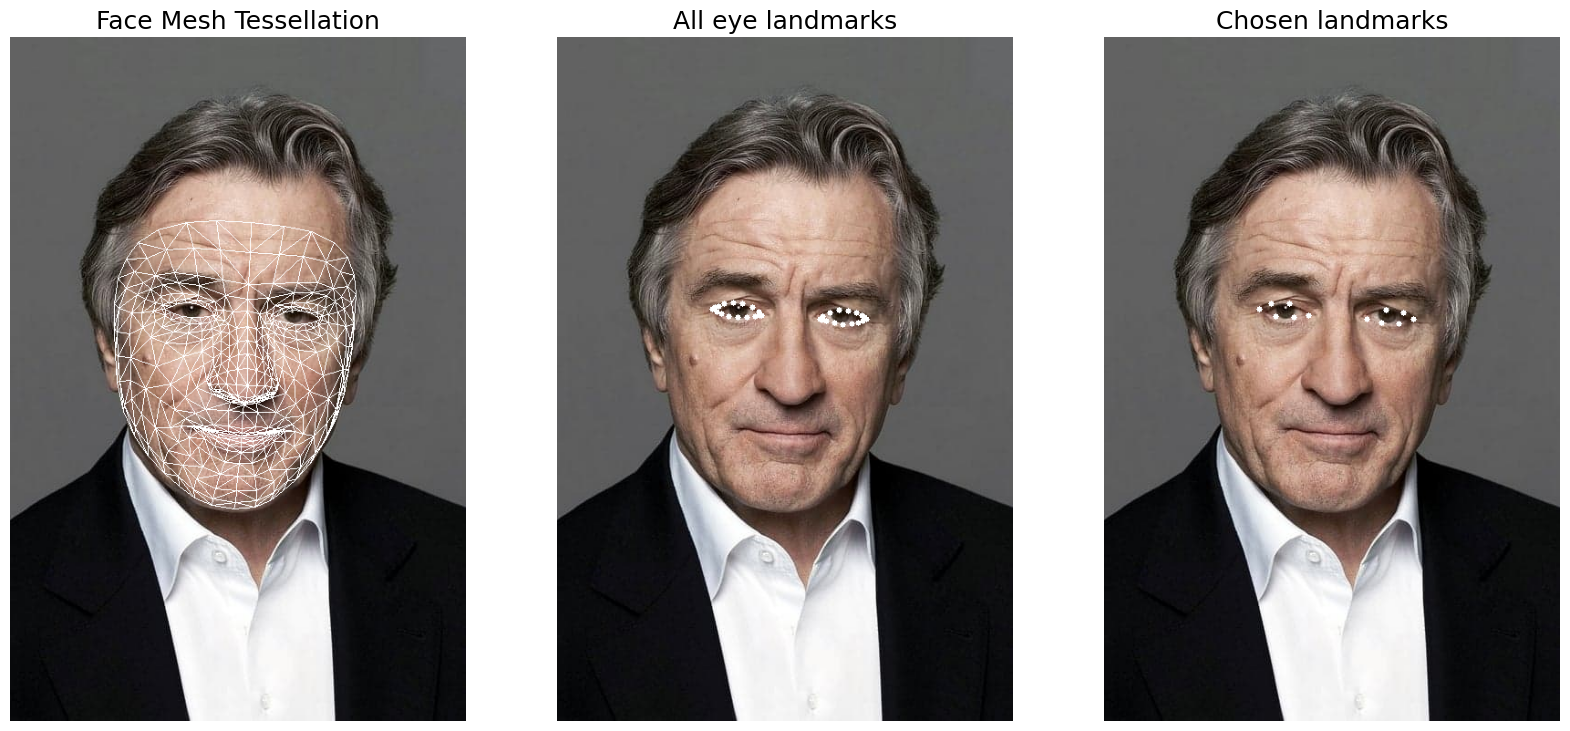

In [8]:
# If detections are available.
if results.multi_face_landmarks:
     
    # Iterate over detections of each face. Here, we have max_num_faces=1, 
    # So there will be at most 1 element in 
    # the 'results.multi_face_landmarks' list            
    # Only one iteration is performed.
 
    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):    
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks)

### **Teknik EAR (Eye Aspect Ratio)**

- Kami akan menggunakan solusi Face Mesh dari Mediapipe untuk mendeteksi dan mengambil tengara yang relevan di wilayah mata (titik P1 - P6 pada gambar di bawah).
- Setelah mendapatkan titik-titik yang relevan, Eye Aspect Ratio (EAR) dihitung antara tinggi dan lebar mata.

- EAR sebagian besar konstan ketika mata terbuka dan mendekati nol, sementara menutup mata sebagian orang, dan pose kepala tidak sensitif. 
- Rasio aspek mata terbuka memiliki varians yang kecil di antara individu. 
- Hal ini sepenuhnya tidak berubah pada penskalaan gambar yang seragam dan rotasi dalam bidang wajah. 
- Karena kedipan mata dilakukan oleh kedua mata secara serempak, maka EAR kedua mata dirata-ratakan.

<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/09-driver-drowsiness-detection-EAR-points-graph-768x443.png" alt="Alt Text" width="500">
    <br><span>Atas: Buka dan tutup mata dengan tengara Pi yang terdeteksi. <br>
Bawah: Rasio aspek mata EAR diplot untuk beberapa frame dari urutan video. Ada satu kedipan mata.</span>
</div>

1. Pertama, kita harus menghitung Rasio Aspek Mata untuk setiap mata:
2. Tanda || (pipa ganda) menunjukkan norma L2 dan digunakan untuk menghitung jarak antara dua vektor
3. Untuk menghitung nilai akhir EAR, penulis menyarankan untuk menghitung rata-rata dari kedua nilai EAR tersebut. <br>
**`Secara umum, nilai Avg. Nilai EAR terletak pada kisaran [0,0, 0,40]. Nilai EAR menurun dengan cepat selama tindakan "menutup mata".`**

<div align='center'>
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/11-driver-drowsiness-detection-EAR-equation-left-right-740x340.png" alt="Alt Text" width="500">
    <img src="https://learnopencv.com/wp-content/uploads/2022/09/12-driver-drowsiness-detection-AVG_EAR-equation-768x193.png" alt="Alt Text" width="500">
</div>

#### **Fungsi Distance**

In [10]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

#### **Fungsi Get EAR Value**

In [11]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.
 
    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame
 
    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, 
                                             frame_width, frame_height)
            coords_points.append(coord)
 
        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])
 
        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)
 
    except:
        ear = 0.0
        coords_points = None
 
    return ear, coords_points

#### **Fungsi AVG EAR**

In [12]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""
 
    left_ear, left_lm_coordinates = get_ear(
                                      landmarks, 
                                      left_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks, 
                                      right_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0
 
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

### **Tes**

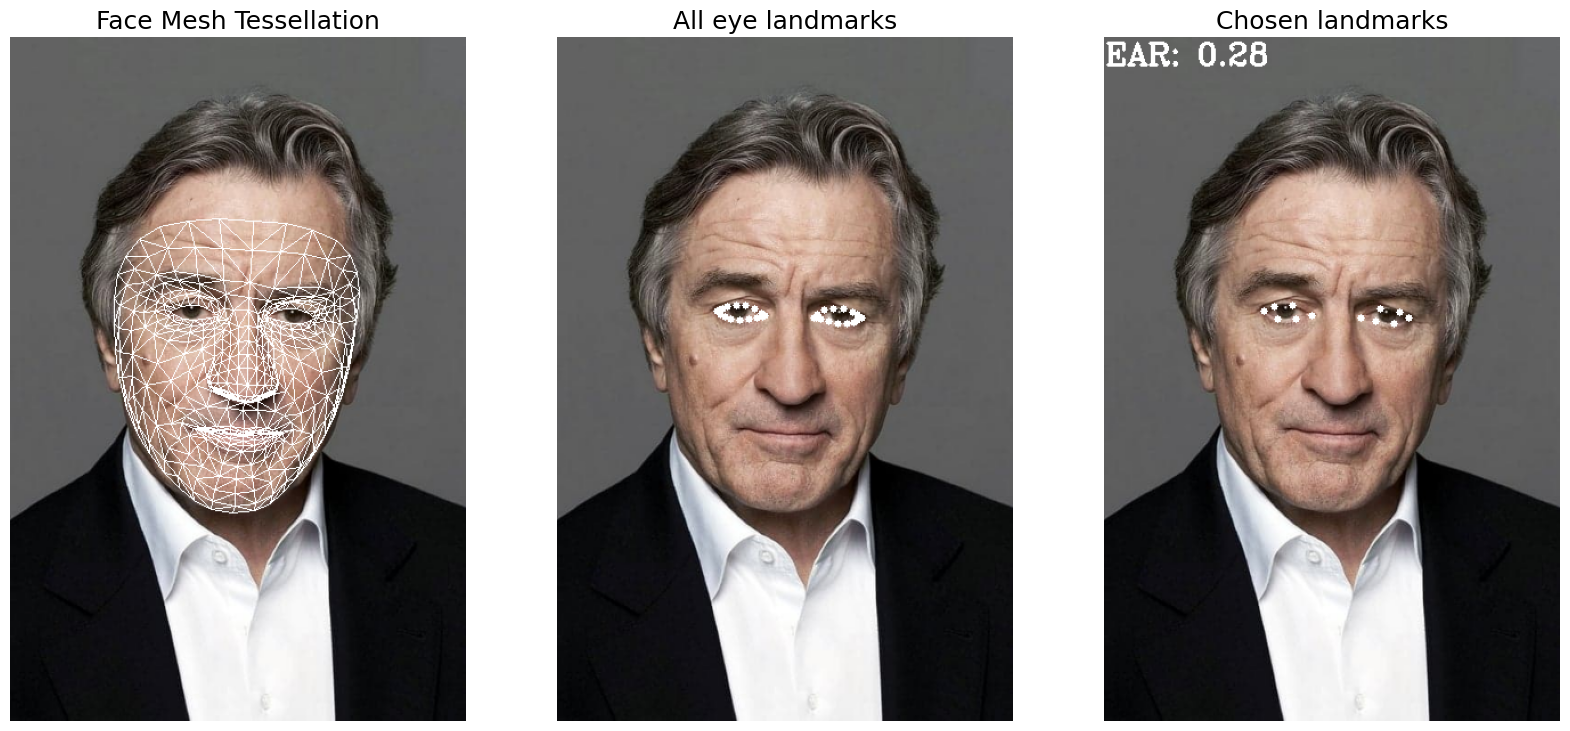

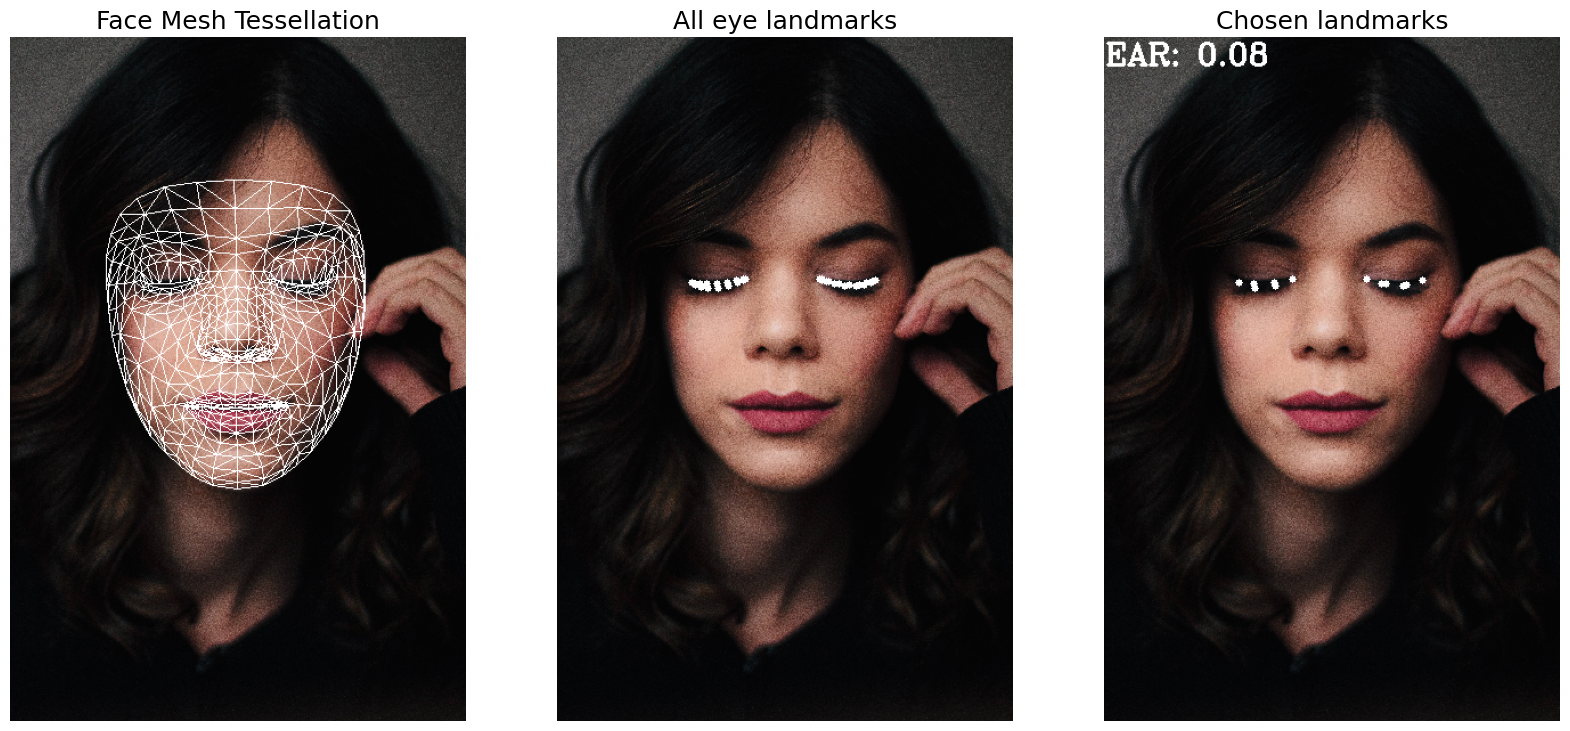

In [28]:
image_eyes_open  = cv2.imread("assets/test-open-eyes.jpg")[:, :, ::-1]
image_eyes_close = cv2.imread("assets/test-close-eyes.jpg")[:, :, ::-1]

image_eyes_open = cv2.resize(image_eyes_open, (400, 600))
image_eyes_close = cv2.resize(image_eyes_close, (400, 600))

for idx, image in enumerate([image_eyes_open, image_eyes_close]):
    
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape
 
    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()
 
    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks
 
        # If detections are available.
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                EAR, _ = calculate_avg_ear(
                          landmarks, 
                          chosen_left_eye_idxs, 
                          chosen_right_eye_idxs, 
                          imgW, 
                          imgH
                      )
 
                # Print the EAR value on the custom_chosen_lmk_image.
                cv2.putText(custom_chosen_lmk_image, 
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX, 
                            0.9, (255, 255, 255), 2
                )                
              
                plot(img_dt=image.copy(),
                     img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks,
                     ts_thickness=1, 
                     ts_circle_radius=3, 
                     lmk_circle_radius=3
                )

### **Deteksi Pengemudi Mengantuk CODE di Python**

1. `get_mediapipe_app(...):` Untuk menginisialisasi objek solusi Mediapipe Face Mesh.
2. `plot_eye_landmarks(...):` Fungsi ini memplot landmark mata yang terdeteksi (dan yang dipilih).
3. `plot_text(...):` Fungsi ini digunakan untuk memplot teks pada frame video, seperti nilai EAR.

In [26]:
def get_mediapipe_app(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
):
    """Initialize and return Mediapipe FaceMesh Solution Graph object"""
    face_mesh = mp.solutions.face_mesh.FaceMesh(
        max_num_faces=max_num_faces,
        refine_landmarks=refine_landmarks,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )
 
    return face_mesh
 
def plot_eye_landmarks(frame, left_lm_coordinates, 
                       right_lm_coordinates, color
                       ):
    for lm_coordinates in [left_lm_coordinates, right_lm_coordinates]:
        if lm_coordinates:
            for coord in lm_coordinates:
                cv2.circle(frame, coord, 2, color, -1)
 
    frame = cv2.flip(frame, 1)
    return frame
 
 
def plot_text(image, text, origin, 
              color, font=cv2.FONT_HERSHEY_SIMPLEX, 
              fntScale=0.8, thickness=2
              ):
    image = cv2.putText(image, text, origin, font, fntScale, color, thickness)
    return image

4. **`define the VideoFrameHandler class.`** In this class, we’ll write the code for the algorithm discussed above. The two methods defined in this class are: __init__() and process(...).

In [18]:
class VideoFrameHandler:
    def __init__(self):
        """
        Initialize the necessary constants, mediapipe app
        and tracker variables
        """
        # Left and right eye chosen landmarks.
        self.eye_idxs = {
            "left": [362, 385, 387, 263, 373, 380],
            "right": [33, 160, 158, 133, 153, 144],
        }
 
        # Used for coloring landmark points.
        # Its value depends on the current EAR value.
        self.RED = (0, 0, 255)  # BGR
        self.GREEN = (0, 255, 0)  # BGR
 
        # Initializing Mediapipe FaceMesh solution pipeline
        self.facemesh_model = get_mediapipe_app()
 
        # For tracking counters and sharing states in and out of callbacks.
        self.state_tracker = {
            "start_time": time.perf_counter(),
            "DROWSY_TIME": 0.0,  # Holds time passed with EAR < EAR_THRESH
            "COLOR": self.GREEN,
            "play_alarm": False,
        }
 
        self.EAR_txt_pos = (10, 30)


- `Pertama`, kita membuat kamus self.eye_idxs. Kamus ini menyimpan posisi indeks tengara mata kiri dan kanan yang kita pilih.
- `Dua variabel warna, self.RED dan self.GREEN`, digunakan untuk mewarnai titik-titik landmark, nilai EAR, dan variabel penghitung `DROWSY_TIME` tergantung pada kondisinya.
- `Selanjutnya`, kami menginisialisasi solusi Mediapipe Face Mesh.
-  `Terakhir`, kita mendefinisikan kamus `self.state_tracker`. Kamus ini menampung semua variabel yang nilainya terus berubah. Secara khusus, kamus ini menyimpan variabel `start_time` dan `DROWSY_TIME,` yang sangat penting untuk algoritme kita.
- `Terakhir`, kita harus mendefinisikan posisi koordinat di mana kita akan mencetak nilai rata-rata `EAR` saat ini pada frame.

### **Process**

In [20]:
def process(self, frame: np.array, thresholds: dict):
        """
        This function is used to implement our Drowsy detection algorithm.
 
        Args:
            frame: (np.array) Input frame matrix.
            thresholds: (dict) Contains the two threshold values
                               WAIT_TIME and EAR_THRESH.
 
        Returns:
            The processed frame and a boolean flag to
            indicate if the alarm should be played or not.
        """
 
        # To improve performance,
        # mark the frame as not writeable to pass by reference.
        frame.flags.writeable = False
        frame_h, frame_w, _ = frame.shape
        DROWSY_TIME_txt_pos = (10, int(frame_h // 2 * 1.7))
        ALM_txt_pos = (10, int(frame_h // 2 * 1.85))
 
        results = self.facemesh_model.process(frame)
 
        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark
            EAR, coordinates = calculate_avg_ear(landmarks,
                                                 self.eye_idxs["left"], 
                                                 self.eye_idxs["right"], 
                                                 frame_w, 
                                                 frame_h
                                                 )
            frame = plot_eye_landmarks(frame, 
                                       coordinates[0], 
                                       coordinates[1],
                                       self.state_tracker["COLOR"]
                                       )
 
            if EAR < thresholds["EAR_THRESH"]:
 
                # Increase DROWSY_TIME to track the time period with 
                # EAR less than the threshold
                # and reset the start_time for the next iteration.
                end_time = time.perf_counter()
 
                self.state_tracker["DROWSY_TIME"] += end_time - self.state_tracker["start_time"]
                self.state_tracker["start_time"] = end_time
                self.state_tracker["COLOR"] = self.RED
 
                if self.state_tracker["DROWSY_TIME"] >= thresholds["WAIT_TIME"]:
                    self.state_tracker["play_alarm"] = True
                    plot_text(frame, "WAKE UP! WAKE UP", 
                              ALM_txt_pos, self.state_tracker["COLOR"])
 
            else:
                self.state_tracker["start_time"] = time.perf_counter()
                self.state_tracker["DROWSY_TIME"] = 0.0
                self.state_tracker["COLOR"] = self.GREEN
                self.state_tracker["play_alarm"] = False
 
            EAR_txt = f"EAR: {round(EAR, 2)}"
            DROWSY_TIME_txt = f"DROWSY: {round(self.state_tracker['DROWSY_TIME'], 3)} Secs"
            plot_text(frame, EAR_txt, 
                      self.EAR_txt_pos, self.state_tracker["COLOR"])
            plot_text(frame, DROWSY_TIME_txt, 
                      DROWSY_TIME_txt_pos, self.state_tracker["COLOR"])
 
        else:
            self.state_tracker["start_time"] = time.perf_counter()
            self.state_tracker["DROWSY_TIME"] = 0.0
            self.state_tracker["COLOR"] = self.GREEN
            self.state_tracker["play_alarm"] = False
 
            # Flip the frame horizontally for a selfie-view display.
            frame = cv2.flip(frame, 1)
 
        return frame, self.state_tracker["play_alarm"]


1. **Kita mulai dengan mengatur flag** `.writeable` pada frame `NumPy` array ke `False`. Hal ini akan membantu meningkatkan performa. Jadi, alih-alih mengirim salinan frame ke setiap fungsi, kita mengirim referensi ke frame.
2. **Selanjutnya,** kita menginisialisasi beberapa konstanta posisi teks dengan mempertimbangkan dimensi frame saat ini.
3. **Frame input yang diteruskan ke metode ini akan dalam format `RGB`.** Ini adalah satu-satunya pemrosesan awal yang diperlukan. Model `Mediapipe` menggunakan frame ini sebagai masukan. Keluarannya dikumpulkan dalam objek hasil.

### **Kesimpulan**

### **FLOW CHART**

1. `Pemeriksaan if-check pertama` adalah untuk menentukan apakah ada deteksi yang tersedia atau tidak. Jika Benar, fungsi calculate_avg_ear(...) akan menghitung nilai rata-rata EAR. 
2. `Fungsi ini juga mengembalikan posisi koordinat denormalisasi saat ini untuk landmark yang dipilih.` Fungsi plot_eye_landmarks(...) memplot koordinat yang telah didenormalisasi ini.
3. `Baris berikutnya adalah if-check ke-2 untuk menentukan apakah EAR saat ini < EAR_THRESH`. Jika Benar, kita mencatat perbedaan antara current_time (waktu_akhir) dan start_time. 
4. `Nilai penghitung DROWSY_TIME bertambah berdasarkan selisih ini.` Kemudian, kita mengatur ulang start_time ke end_time. Ini membantu dengan melacak waktu antara frame saat ini dan frame berikutnya (jika EAR masih kurang dari EAR_THRESH).
5. `Pengecekan if ke-3 adalah untuk menentukan apakah DROWSY_TIME >= WAIT_TIME.` Ambang batas WAIT_TIME menyimpan nilai jumlah waktu yang diperbolehkan dengan mata tertutup.
6. `Jika kondisi ke-3 adalah True,` kita mengatur status flag boolean play_alarm menjadi True.
7. `Jika kondisi ke-1 dan ke-2 bernilai False,` setel ulang variabel status. Status variabel COLOR juga berubah berdasarkan kondisi di atas. Warna teks untuk mencetak EAR dan
8. `DROWSY_TIME pada frame tergantung pada status COLOR.`
9. `Terakhir,` kita mengembalikan frame yang telah diproses dan nilai variabel state play_alarm.

In [25]:
import os
import av
import threading
import streamlit as st
from streamlit_webrtc import VideoHTMLAttributes, webrtc_streamer
 
from audio_handling import AudioFrameHandler
from drowsy_detection import VideoFrameHandler
 
# Define the audio file to use.
alarm_file_path = os.path.join("audio", "wake_up.wav")
 
# Streamlit Components
st.set_page_config(
    page_title="Drowsiness Detection | LearnOpenCV",
    page_icon="https://learnopencv.com/wp-content/uploads/2017/12/favicon.png",
    layout="centered",
    initial_sidebar_state="expanded",
    menu_items={
        "About": "### Visit www.learnopencv.com for more exciting tutorials!!!",
    },
)
 
st.title("Drowsiness Detection!")
 
col1, col2 = st.columns(spec=[1, 1])
 
with col1:
    # Lowest valid value of Eye Aspect Ratio. Ideal values [0.15, 0.2].
    EAR_THRESH = st.slider("Eye Aspect Ratio threshold:", 0.0, 0.4, 0.18, 0.01)
 
with col2:
    # The amount of time (in seconds) to wait before sounding the alarm.
    WAIT_TIME = st.slider("Seconds to wait before sounding alarm:", 0.0, 5.0, 1.0, 0.25)
 
thresholds = {
    "EAR_THRESH": EAR_THRESH,
    "WAIT_TIME": WAIT_TIME,
}
 
# For streamlit-webrtc
video_handler = VideoFrameHandler()
audio_handler = AudioFrameHandler(sound_file_path=alarm_file_path)
 
# For thread-safe access & to prevent race-condition.
lock = threading.Lock()  
 
shared_state = {"play_alarm": False}
 
def video_frame_callback(frame: av.VideoFrame):
    frame = frame.to_ndarray(format="bgr24")  # Decode and convert frame to RGB
 
    frame, play_alarm = video_handler.process(frame, thresholds)  # Process frame
    with lock:
        shared_state["play_alarm"] = play_alarm  # Update shared state
     
    # Encode and return BGR frame
    return av.VideoFrame.from_ndarray(frame, format="bgr24")  
 
def audio_frame_callback(frame: av.AudioFrame):
    with lock:  # access the current “play_alarm” state
        play_alarm = shared_state["play_alarm"]
 
    new_frame: av.AudioFrame = audio_handler.process(frame,
                                                     play_sound=play_alarm)
    return new_frame
 
ctx = webrtc_streamer(
    key="driver-drowsiness-detection",
    video_frame_callback=video_frame_callback,
    audio_frame_callback=audio_frame_callback,
    rtc_configuration={"iceServers": [{"urls": ["stun:stun.l.google.com:19302"]}]},
    media_stream_constraints={"video": {"width": True, "audio": True}},
    video_html_attrs=VideoHTMLAttributes(autoPlay=True, controls=False, muted=False),
)

ModuleNotFoundError: No module named 'audio_handling'